# 5. Minimal plotting

As this is not a data visualization course, we won't spend too much time on this topic. We only introduce the very basics so that you can easily visualize data and their relationships.

We introduce here both Matplotlib (that you fill find used everywhere) as well as Seaborn, as library that builds on top of Matplotlib which is capable of producing nice plots "out-of-the-box".

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Matplotlib

### Dataset

We start by creating a simple dataset. As an exercise we do this by using Numpy functions. First we generate an x-axis:

In [11]:
x_val = np.arange(0, 10, 0.1)

Then we create a new array that is just the cosine of ```x_val```:

In [12]:
y_val = np.cos(x_val)

### Line plot

Those two arrays are all we need to create the simplest possible plot of a function ```y_val = cos(x_val)```. The first thing that we have to do is to **create a figure object and an axis object** with Matplotlib. The figure object can contain many elements (imagine for example a grid of plots), while the axis object contains a specific plot. We can get a figure and and an axis using the ```subplots()``` function:

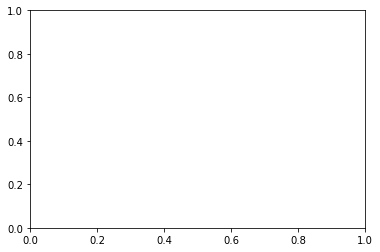

In [13]:
fig, ax = plt.subplots()

As you see above this produces a blank figure that we need to fill. As all the variables that we have seen until now (Numpy arrays, Pandas dataframe) the ```fig``` and ```ax``` objects have specific functions attached to them. ```ax``` in particular has all the plotting functions attached to it. In particular the simple ```plot()``` function, which takes two arguments: x values and y values: 

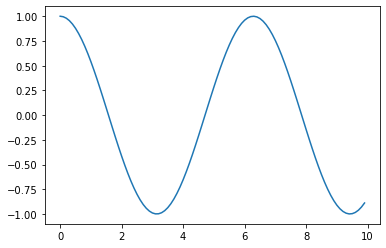

In [14]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val);

That's it, we have our plot! We can easily add more data to it by just calling more times the ```ax.plot``` function. For example we can generate a new y signal for the sine:

In [15]:
y_val2 = np.sin(x_val)

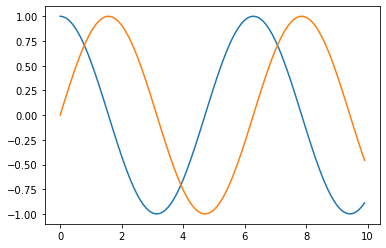

In [16]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val);
ax.plot(x_val, y_val2);

We will see later how to adjust everything on this plot from colors to labels etc. The only additional point we show here is how to show every datapoint with a marker such as a circle using an additional parameter representing the line/marker type:

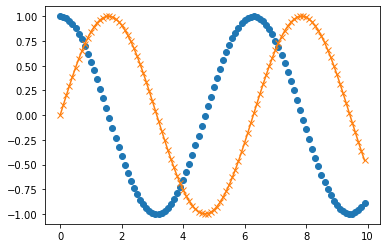

In [17]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val,'o');
ax.plot(x_val, y_val2,'-x');

### Histogram

The other type of plot that is very useful, in particular when dealing with statistics, is the histogram. The principle of figure creation is the same. Except that now we use the ```ax.hist()``` commmand which takes only one argument, the values that we want to turn into a histogram:

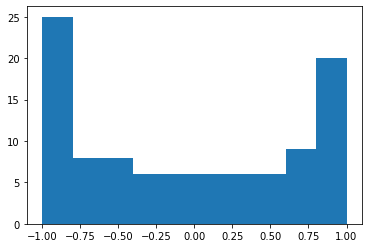

In [18]:
fig, ax = plt.subplots()
ax.hist(y_val);

Again, we will see how to specify more options for this plot. At the moment we only show that we can specify the position of the bins that we want to use for binning. This can be useful if the default bin size is not satisfactory. We can simply use the ```bins``` arguments and pass an array of positions:

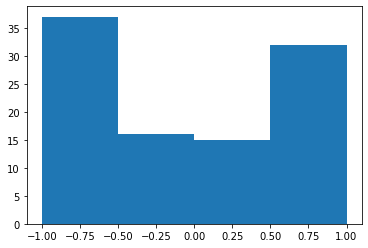

In [19]:
fig, ax = plt.subplots()
ax.hist(y_val, bins=np.arange(-1,1.5,0.5));

## Seaborn

As mentioned above, Seaborn create nicer plots by defaults than Matplotlib but builds on top of that library. Hence if you want to modify your plots, you can do it easily through Matplotlib.

One advantage of of Seaborn is that it can handle DataFrames and *use information* like column names to improve the plot. We first import a dataset:

In [23]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Instead of passing directly lists of numbers to the plotting functions, we can now just say:
1. Which ```data``` to plot, here the ```wine``` Dataframe
2. Which columns to use e.g. for ```x``` and ```y``` axis for a scatter plot
3. How to "render" the plot. E.g. should we color things by a certain category

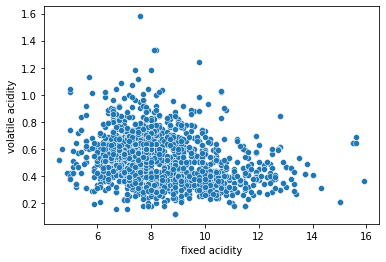

In [25]:
sns.scatterplot(data=wine, x='fixed acidity', y = 'volatile acidity');

As you can see the default choice of rendering is better than in Matplotlib. Also Seaborn used the column names to label the axes.

We mentioned above that we could in addition for example color the dots by a certain category. The only *categorical* variable we have is the quality. So let us use that parameter as ```hue``` or color parameter:

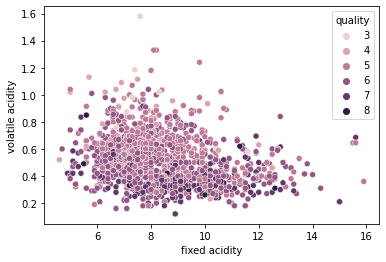

In [26]:
sns.scatterplot(data=wine, x='fixed acidity', y = 'volatile acidity', hue='quality');

There is a large number of plots that can be created with Seaborn, with a specific focus on statistics and data science. We will discover as we go along in this course. Here one last example for a histogram:

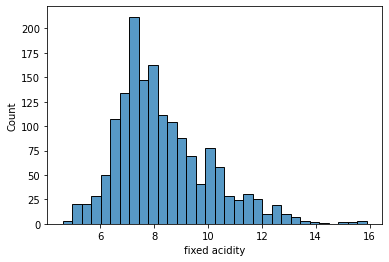

In [42]:
sns.histplot(data=wine, x='fixed acidity');

## Exercise

1. Using Pandas, import the CSV file located at https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv
2. Display the first 3 lines using the ```head()``` function.
3. Rembering that you can extract a given column from the table using ```my_dataframe['column_name']```, try to plot the ```bill_depth_mm```as as function of ```bill_depth_mm``` using the Matplotlib ```plot``` function. Does it work ? Did you pass a Numpy array to the plotting function ?
4. Change the line/marker type so that you obtain a scatter plot, i.e. only single dots without a line
5. Create the same plot using Seaborn